In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class MagicCard():
    def __init__(self, startingPrice, meanPctChange, stdPctChange):
        self.currentPrice = startingPrice
        self.meanChange = meanPctChange
        self.stdChange = stdPctChange
    
    def getPrice(self):
        return self.currentPrice
    
    def updatePrice(self):
        self.currentPrice *= (1.0+self.meanChange + self.stdChange * np.random.randn())
        self.meanChange *= .99
    
    def updateAndGet(self):
        self.updatePrice()
        return self.getPrice()
    
    def updateDistribution(self, a, m):
        newMean = (np.random.pareto(a) + 1) * m 
        if np.random.rand()<.5:
            newMean *= -1
        self.meanChange = newMean
        
    
    def updateNTimesteps(self, n, returnHistory=None):
        history = [self.getPrice()]
        for i in range(n):
            updatedPrice = self.updateAndGet()
            if returnHistory:
                history.append(updatedPrice)
        if returnHistory:
            return history
        else:
            return None

commons mean and median and max and min:
0.0140961231612
0.00208322976527
0.473770642016
1.44559555257e-05
uncommons mean and median and max and min:
0.133799832488
0.0272666423449
1.67160101319
0.00101395127487
rares mean and median and max and min:
1.7714766589
0.138582490322
58.1011113646
0.00108360248363
mythics mean and median and max and min:
2.01931203198
0.717266216178
7.21517393754
0.0594024666448


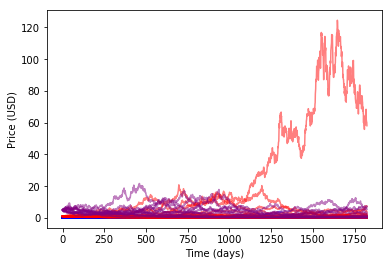

197


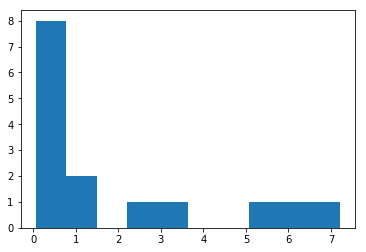

In [8]:
count = 0
finalPrices = []
finalArr = []
n_commons = 100
n_uncommons = 60
n_rares = 50
n_mythics = 15
years = 5
for x in range(n_commons):
    #print("x",x)
    arrs = []
    fB = MagicCard(0.01, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="green")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
        
print("commons mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))

finalPrices = []
finalArr = []
for x in range(n_uncommons):
    #print("x",x)
    arrs = []
    fB = MagicCard(0.1, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="blue")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
        
print("uncommons mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))
        
finalPrices = []
finalArr = []
for x in range(n_rares):
    #print("x",x)
    arrs = []
    fB = MagicCard(1, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="red")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
print("rares mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))

finalPrices = []
finalArr = []
for x in range(n_mythics):
    #print("x",x)
    arrs = []
    fB = MagicCard(5, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="purple")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
print("mythics mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))
        
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,0.10])
plt.ylabel("Price (USD)")
plt.xlabel("Time (days)")
plt.show()
print(count)
plt.close()
plt.figure()
plt.hist(finalPrices)
plt.show()

#plt.figure()
#plt.plot(np.mean(np.array(arrs), axis=0))
#plt.show()

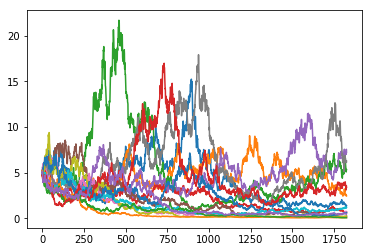

In [12]:
#a, m = 5, 1/365
#arr = (np.random.pareto(a, 100000)) * m 
#plt.hist(arr, 100)
for i in range(len(finalArr)): plt.plot(np.array(finalArr[i]))
plt.show()
#print(arr.min(), arr.max())

In [46]:
import pandas as pd
#np.array(finalArr).shape
import datetime
numdays=3650
base = datetime.datetime.today()
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]
date_list = [x.strftime("%Y-%m-%d") for x in date_list]

In [47]:
mat = np.array(finalArr)
cards = pd.DataFrame(mat)

In [49]:
cards.columns=date_list
cards.to_csv("cards_database.csv")

In [35]:
def simulate(nCards, nTimesteps):
    finalPrices = []
    finalArr = []
    for x in range(nCards):
        #print("x",x)
        arrs = [5]
        fB = MagicCard(5, 0.1/365, .04)
        for i in range(nTimesteps):
            if i % 90 == 0:
                fB.updateDistribution(5, 1/365)
            arr = fB.updateAndGet()
            arrs.append(arr)
        plt.plot(arrs, alpha=0.5)
        finalPrices.append(arrs[-1])
        finalArr.append(arrs)
       # print("done")
    print("mythics mean and median and max and min:")
    print(np.mean(finalPrices))
    print(np.median(finalPrices))
    print(np.max(finalPrices))
    print(np.min(finalPrices))
    return finalArr

mythics mean and median and max and min:
5.18480919707
4.68432435724
18.2806705985
1.30261035605


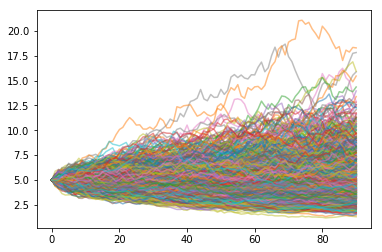

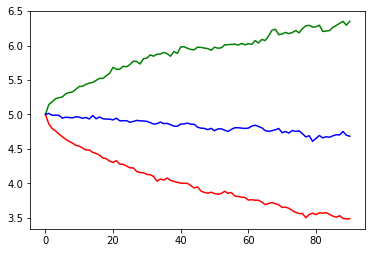

In [36]:
finalArr = simulate(1000, 90)
plt.figure()
plt.plot(np.percentile(np.array(finalArr),25, axis=0), color="red")
plt.plot(np.percentile(np.array(finalArr), 75, axis=0), color="green")
plt.plot(np.percentile(np.array(finalArr), 50, axis=0), color="blue")
plt.show()

In [ ]:
param = np.array(finalArr)[:,40]

